# Cartão de crédito

In [47]:
import pandas as pd


In [48]:
data = pd.read_csv('CC GENERAL.csv')

In [49]:
data.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [50]:
data.drop(columns=['CUST_ID','TENURE'], inplace=True)


In [51]:
data.head(5)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0   201.802084        139.509787          0.000000  
1  4103.032597       1072.340217          0.222222  
2   622.066742        627.284787          0.000000  
3     0.000000               NaN          0.000000  
4   678.334763        244.791237          0.000000

In [52]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [53]:
data.fillna(data.median(),inplace=True)
data.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [54]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(data.values)

In [55]:
from sklearn.cluster import KMeans

In [56]:
kmeans = KMeans(n_clusters=5,n_init=10,max_iter=300)
y_pred = kmeans.fit_predict(values)

In [57]:
# Coeficiente de silhouette

from sklearn import metrics

labels = kmeans.labels_
silhoute = metrics.silhouette_score(values, labels, metric='euclidean')

In [58]:
silhoute

0.3644845919974304

In [59]:
dbs = metrics.davies_bouldin_score(values,labels)
dbs

1.0757138590613295

In [60]:
calinski = metrics.calinski_harabasz_score(values,labels)
calinski

3431.79374284143

In [63]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [64]:
clustering_algorithm(3,values)

(0.32723798026310313, 1.3095216018943303, 3526.4553723329195)

In [66]:
import numpy as np
random_data = np.random.rand(8950,16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)


0.039123870244504984 3.5451565155313167 300.40910321598506


In [67]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36897094584161894 1.0581656052369075 1204.0560966145404
0.35416642754504835 1.1382306445993162 1194.9519865048878
0.36711806123637947 1.0983674003891761 1167.5043802024989


<function matplotlib.pyplot.show(close=None, block=None)>

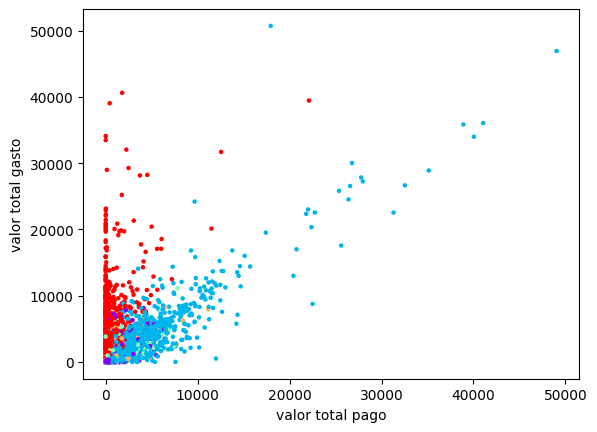

In [71]:
import matplotlib.pyplot as plt
plt.scatter(data['PURCHASES'],data['PAYMENTS'], c=labels,s=5,cmap='rainbow')
plt.xlabel("valor total pago")
plt.ylabel("valor total gasto")
plt.show

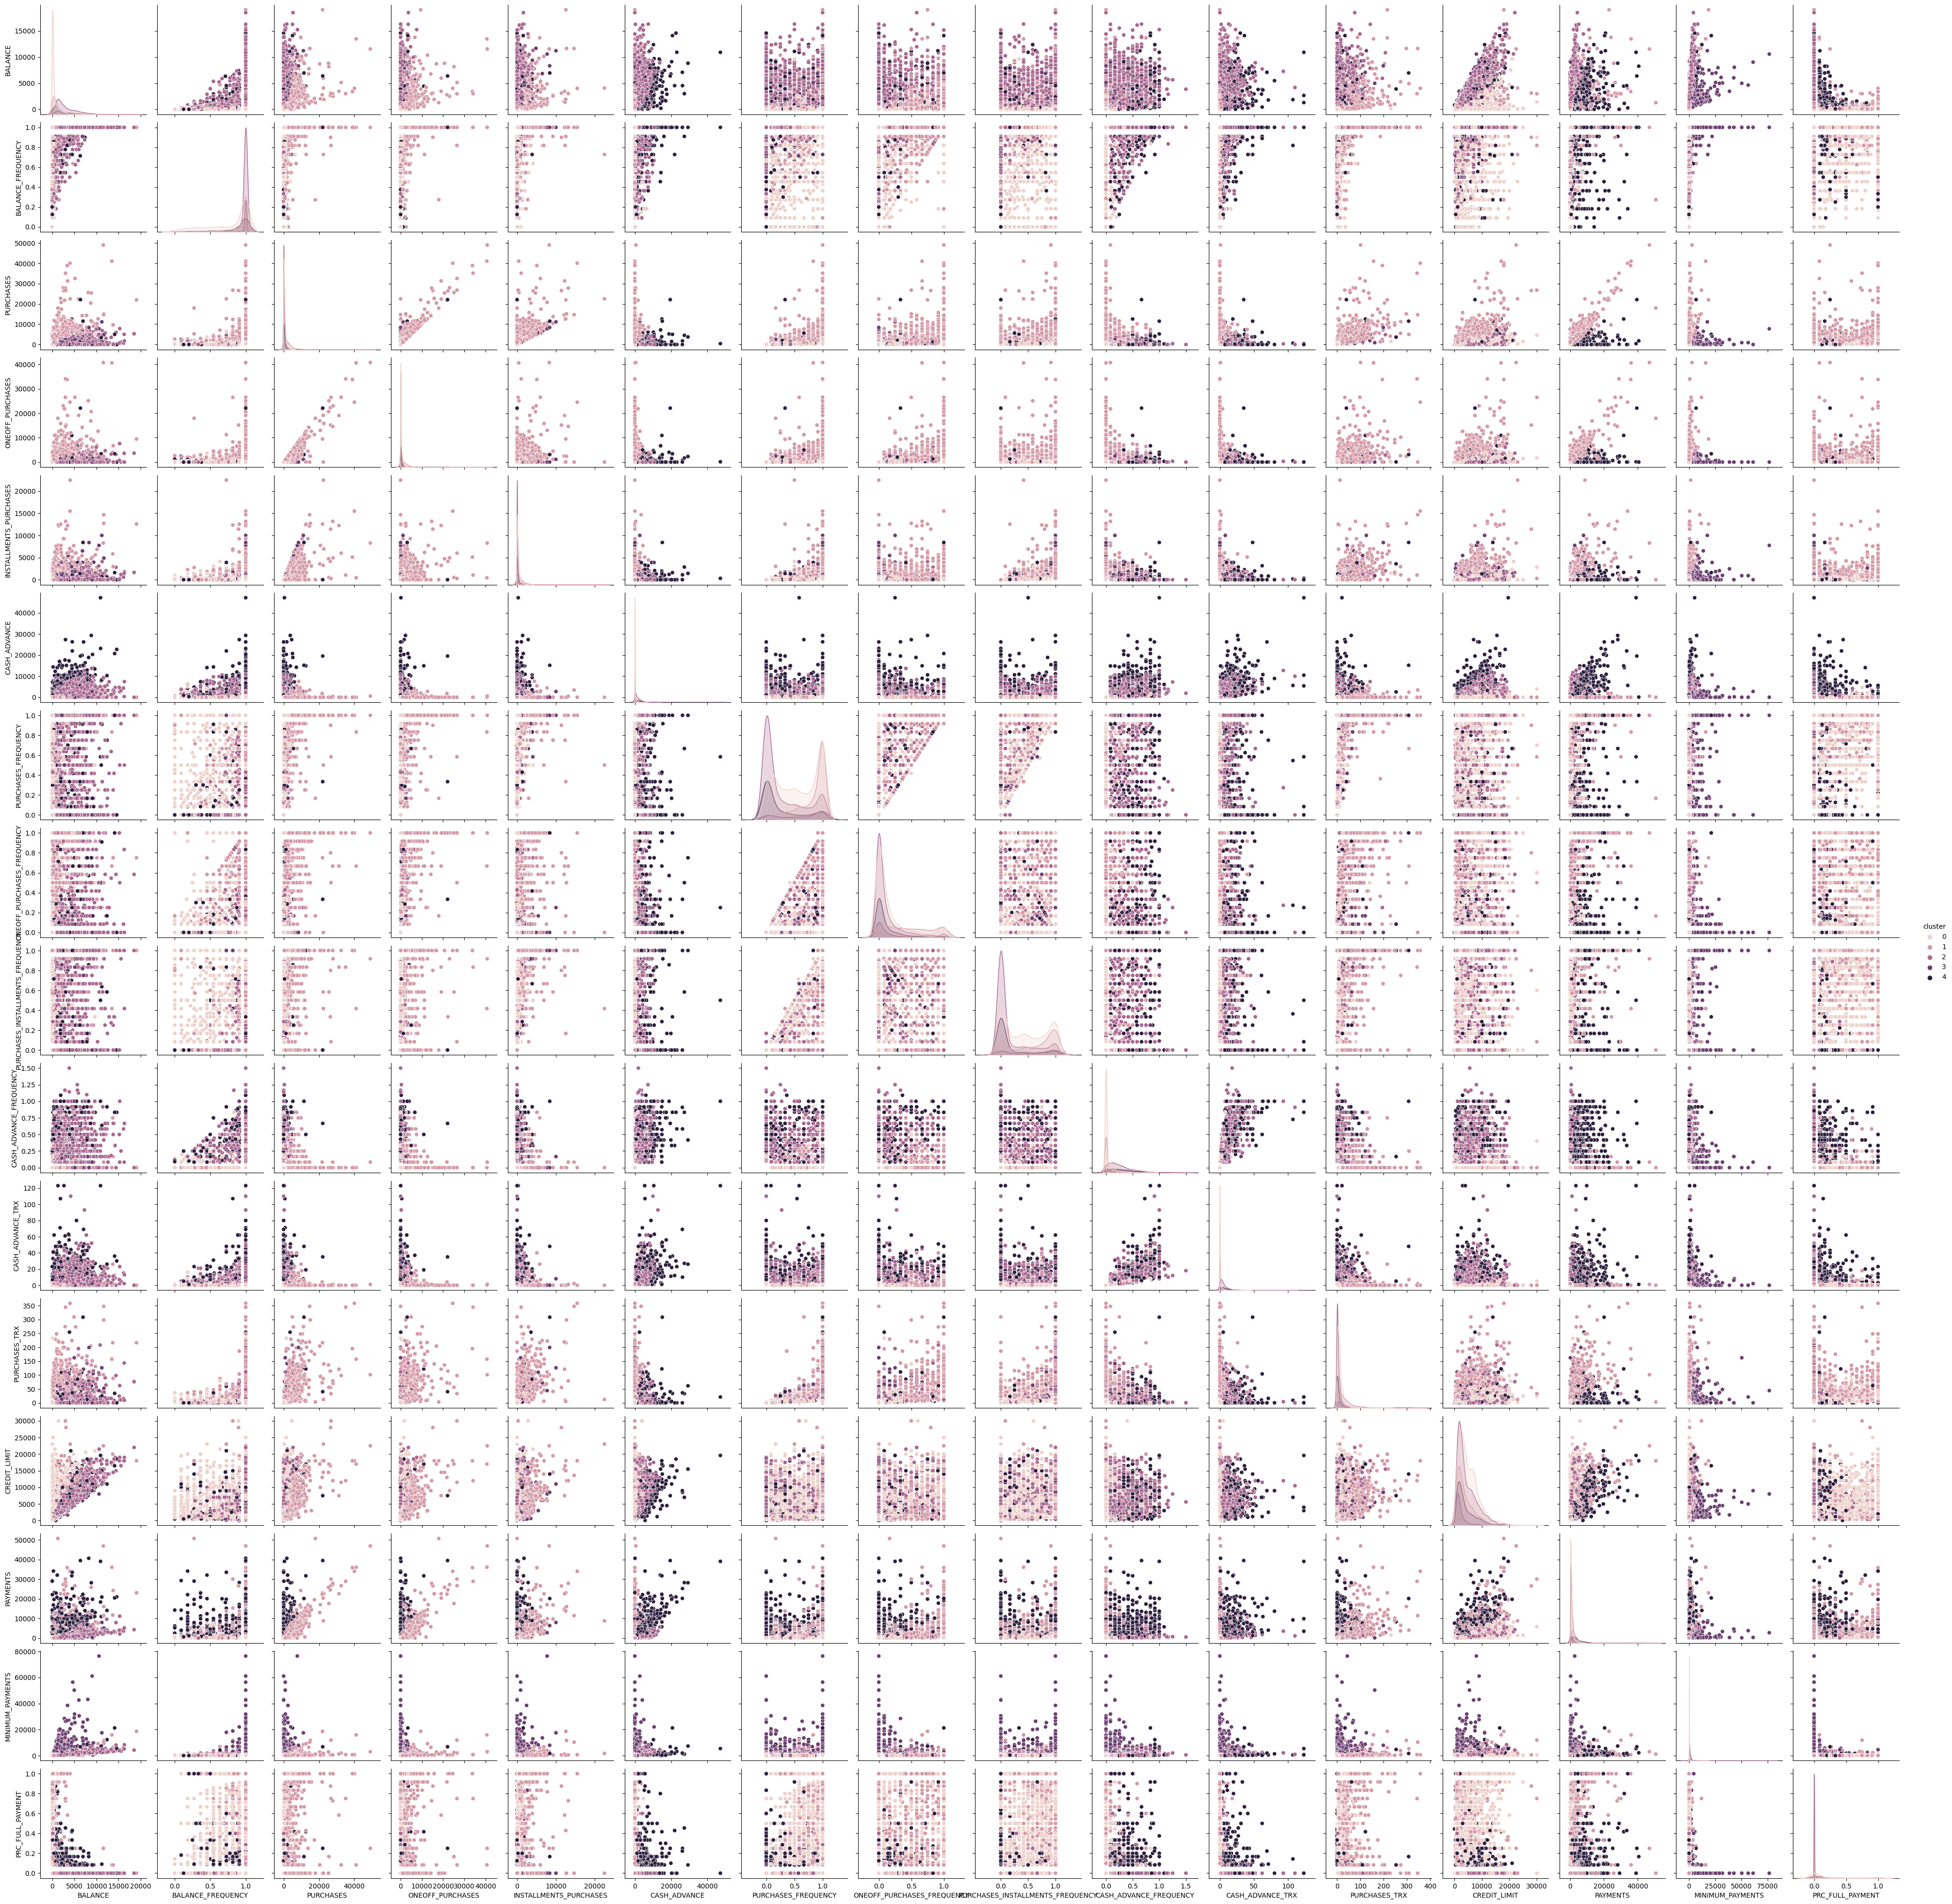

In [72]:
import seaborn as sns
data["cluster"] = labels
sns.pairplot(data[0:], hue="cluster")

In [73]:
data.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        3278.0   443.992358   846.597972   0.000000    23.315538   
1        1540.0  1142.222657  1664.035755   0.000000   211.566656   
2        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
3         411.0  1987.501586  1854.459156  70.794108  1018.958891   
4        1072.0  1794.024195  1982.950586   0.000000   506.925348   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          82.992153   411.193793   9630.367575            3278.0  0.774417   
1         554.332740  1370.859355  19043.138560            1540.0  0.928053   
2        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
3        1337.287314  2138.678431  11670.179850             411.0  0.989486   
4        1087.920500  2308.762488  14581.459140            1072.0  0.862131   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       248.800040   4483.503862           3278.0  0.246549   
1        ...       524.184580  18621.013310           1540.0  0.278582   
2        ...      1330.593643   8345.641905           2649.0  0.001799   
3        ...      7112.618584  76406.207520            411.0  0.019318   
4        ...       884.718306  21235.065300           1072.0  0.117384   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.346601  0.0  0.0  0.000000  0.444444  1.0  
1        0.367203  0.0  0.0  0.083333  0.545455  1.0  
2        0.023260  0.0  0.0  0.000000  0.000000  0.6  
3        0.090901  0.0  0.0  0.000000  0.000000  1.0  
4        0.186853  0.0  0.0  0.083333  0.142857  1.0  

[5 rows x 128 columns]

In [74]:
centroids = kmeans.cluster_centers_
print(centroids)

[[6.91386971e-02 2.30552524e-04 1.21267798e-01 4.80255998e-02
  7.33425496e-02 2.43607736e-02 1.72581896e-04 3.37097813e-05
  1.40021986e-04 7.93309218e-06 1.24113667e-04 2.86037895e-03
  9.43728649e-01 1.53557708e-01 5.68217245e-02 7.57977264e-05]
 [1.59699490e-01 2.45649360e-04 4.38116859e-01 2.56325660e-01
  1.81962376e-01 2.57889184e-02 2.04826443e-04 8.87914942e-05
  1.51162866e-04 9.36296056e-06 1.69350945e-04 6.17145756e-03
  6.04336246e-01 4.02584838e-01 8.54128174e-02 7.26645255e-05]
 [5.04263792e-01 2.72194282e-04 6.17808431e-02 3.62269020e-02
  2.55756543e-02 2.52903017e-01 6.73170559e-05 2.56975193e-05
  4.50651626e-05 5.74388410e-05 1.15687334e-03 1.33194105e-03
  7.19174706e-01 1.66205262e-01 1.79245673e-01 5.52303554e-07]
 [3.32918803e-01 2.68423552e-04 1.58240376e-01 3.63059801e-02
  1.22319068e-01 5.83557153e-02 1.66754597e-04 2.64938445e-05
  1.47063187e-04 1.93217566e-05 4.27934836e-04 3.86197017e-03
  3.76718873e-01 2.51861450e-01 6.80311114e-01 4.23993819e-06]
 [2.

In [76]:
max = len(centroids[0])
for i in range(max):
    print(data.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0543
PRC_FULL_PAYMENT 
0.0000


In [77]:
data.groupby("cluster")["BALANCE"].describe()

count         mean          std        min          25%  \
cluster                                                             
0        3278.0   443.992358   846.597972   0.000000    23.315538   
1        1540.0  1142.222657  1664.035755   0.000000   211.566656   
2        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
3         411.0  1987.501586  1854.459156  70.794108  1018.958891   
4        1072.0  1794.024195  1982.950586   0.000000   506.925348   

                 50%          75%           max  
cluster                                          
0          82.992153   411.193793   9630.367575  
1         554.332740  1370.859355  19043.138560  
2        2174.018945  4223.867789  18495.558550  
3        1337.287314  2138.678431  11670.179850  
4        1087.920500  2308.762488  14581.459140

In [78]:
description = data.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0         443.992358   629.345171    141.569301   5132.945933   814.477150   
1        1142.222657  3268.886929    183.019398   4097.701397  3037.241495   
2        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
3        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
4        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   

         n_clients  
cluster             
0             3278  
1             1540  
2             2649  
3              411  
4             1072  


C:\Users\Alysson\AppData\Local\Temp\ipykernel_2660\1451459291.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = data.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
